In [8]:
import shapely
from shapely.geometry import LinearRing, LineString, Point
from numpy import sin, cos, pi, sqrt
from random import random

import numpy as np
from matplotlib import pyplot as plt

In [9]:
# A prototype simulation of a differential-drive robot with one sensor

# Constants
###########
R = 0.02  # radius of wheels in meters
L = 0.10  # distance between wheels in meters

W = 2.0  # width of arena
H = 2.0  # height of arena

robot_timestep = 0.1        # 1/robot_timestep equals update frequency of robot
simulation_timestep = 0.01  # timestep in kinematics sim (probably don't touch..)

# the world is a rectangular arena with width W and height H
world = LinearRing([(W/2,H/2),(-W/2,H/2),(-W/2,-H/2),(W/2,-H/2)])

# Variables 
###########

x = 0.0   # robot position in meters - x direction - positive to the right 
y = 0.0   # robot position in meters - y direction - positive up
q = 0.0   # robot heading with respect to x-axis in radians 

left_wheel_velocity =  random()   # robot left wheel velocity in radians/s
right_wheel_velocity =  random()  # robot right wheel velocity in radians/s

# Kinematic model
#################
# updates robot position and heading based on velocity of wheels and the elapsed time
# the equations are a forward kinematic model of a two-wheeled robot - don't worry just use it
def simulationstep():
    global x, y, q

    for step in range(int(robot_timestep/simulation_timestep)):     #step model time/timestep times
        v_x = cos(q)*(R*left_wheel_velocity/2 + R*right_wheel_velocity/2) 
        v_y = sin(q)*(R*left_wheel_velocity/2 + R*right_wheel_velocity/2)
        omega = (R*right_wheel_velocity - R*left_wheel_velocity)/(2*L)    
    
        x += v_x * simulation_timestep
        y += v_y * simulation_timestep
        q += omega * simulation_timestep

# Simulation loop
#################
file = open("trajectory.dat", "w")

for cnt in range(5000):
    #simple single-ray sensor
    ray = LineString([(x, y), (x+cos(q)*2*W,-(y+sin(q)*2*H)) ])  # a line from robot to a point outside arena in direction of q
    s = world.intersection(ray)
    distance = sqrt((s.x-x)**2+(s.y-y)**2)                    # distance to wall
    
    #simple controller - change direction of wheels every 10 seconds (100*robot_timestep) unless close to wall then turn on spot
    if (distance < 0.5):
        left_wheel_velocity = -0.4
        right_wheel_velocity = 0.4
    else:                
        if cnt%100==0:
            left_wheel_velocity = random()
            right_wheel_velocity = random()
        
    #step simulation
    simulationstep()

    #check collision with arena walls 
    if (world.distance(Point(x,y))<L/2):
        break
        
    if cnt%50==0:
        file.write( str(x) + ", " + str(y) + ", " + str(cos(q)*0.05) + ", " + str(sin(q)*0.05) + "\n")

file.close()

In [10]:
# load data from file into numpy
data = np.loadtxt('trajectory.dat', delimiter=", ")
print(data)

[[ 3.00424589e-04 -3.94692364e-07  4.99997869e-02 -1.45975467e-04]
 [ 1.52652884e-02 -1.13632752e-03  4.94467788e-02 -7.41728175e-03]
 [ 2.99735792e-02 -4.45655963e-03  4.79125879e-02 -1.42962904e-02]
 [ 4.79828806e-02 -8.87516154e-03  4.90904917e-02 -9.49334632e-03]
 [ 6.74878394e-02 -1.15997576e-02  4.97918614e-02 -4.55747093e-03]
 [ 1.43569301e-01 -1.32605437e-02  4.99426428e-02  2.39424888e-03]
 [ 2.18264592e-01 -4.51837013e-03  4.92088577e-02  8.85936338e-03]
 [ 2.49455870e-01 -3.76487706e-03  4.95752383e-02 -6.50351813e-03]
 [ 2.80380038e-01 -1.29672801e-02  4.54368330e-02 -2.08684980e-02]
 [ 3.59541673e-01 -4.39891256e-02  4.75212674e-02 -1.55476413e-02]
 [ 4.41512480e-01 -6.57362074e-02  4.89170665e-02 -1.03499085e-02]
 [ 5.11872020e-01 -8.88741291e-02  4.55032160e-02 -2.07233524e-02]
 [ 5.75140859e-01 -1.26446708e-01  3.97665484e-02 -3.03087714e-02]
 [ 6.06461647e-01 -1.64805217e-01  2.17024027e-02 -4.50444860e-02]
 [ 6.16993913e-01 -2.13216317e-01 -2.40038629e-04 -4.99994238e

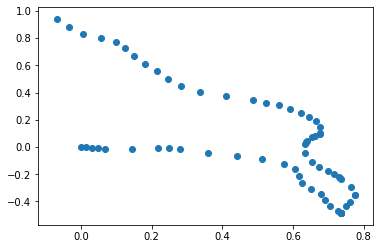

In [11]:
plt.scatter(data[:,:1], data[:,1:2])

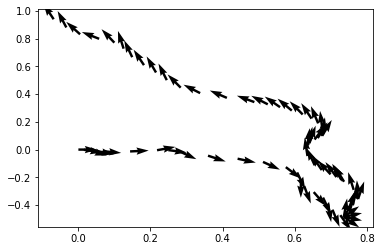

In [12]:
plt.quiver(data[:,:1], data[:,1:2], data[:,2:3], data[:,3:4])